In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
bollywood_df = pd.read_csv(r'C:\Users\Ashish\Desktop\machine learning\bollywood.csv')
bollywood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [26]:
bollywood_df.head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
5,6,30-May-14,Citylights,HS,Drama,7,35.00,1076591,1806,84
6,7,19-Sep-14,Daawat-E-Ishq,N,Comedy,30,24.60,3905050,8315,1373
7,8,11-Jan-13,Matru Ki Bijlee Ka Mandola,N,Comedy,33,40.00,2435283,4326,647
8,9,10-Jan-14,Dedh Ishqiya,LW,Comedy,31,27.00,2333067,2436,591
9,10,11-Jan-13,Gangoobai,N,Drama,2,0.01,4354,1,1


In [20]:
bollywood_df['Genre']  = bollywood_df['Genre'].str.strip()
genre_count = bollywood_df['Genre'].value_counts()
genre_count

Genre
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: count, dtype: int64

In [22]:
pd.crosstab(bollywood_df['ReleaseTime'], bollywood_df['Genre'])

Genre,Action,Comedy,Drama,Romance,Thriller
ReleaseTime,,,,,
FS,3,3,4,3,4
HS,3,5,6,3,1
LW,3,5,1,4,2
N,15,23,24,15,22


In [36]:
bollywood_df['Release Date'] = pd.to_datetime(bollywood_df['Release Date'], errors = 'coerce')
bollywood_df['Month'] = bollywood_df['Release Date'].dt.month

movies_per_month = bollywood_df['Month'].value_counts()

max_month = movies_per_month.idxmax()
max_count = movies_per_month.max()


In [42]:
bollywood_df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,4
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7


In [44]:
max_count

20

In [46]:
max_month

1

In [50]:
bollywood_df['ROI'] = bollywood_df['BoxOfficeCollection']-bollywood_df['Budget']/bollywood_df['Budget']

In [52]:
bollywood_df['ROI']

0      103.00
1       11.00
2        3.00
3       -0.65
4        9.80
        ...  
144     29.00
145     31.10
146     11.00
147     10.89
148    119.00
Name: ROI, Length: 149, dtype: float64

In [58]:
max(bollywood_df['ROI'])

734.0

In [60]:
bollywood_df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,103.00
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,11.00
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,3.00
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,-0.65
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,9.80


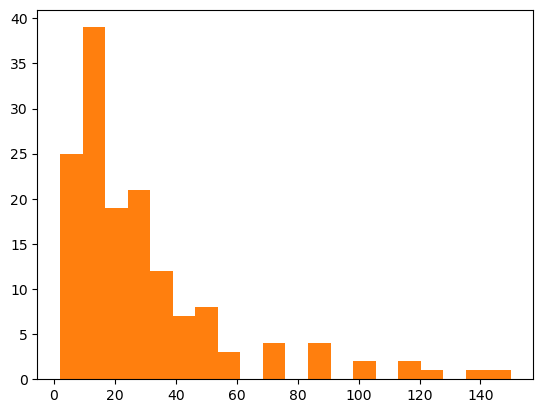

In [66]:
plt.hist(bollywood_df['Budget'], bins = 20)
plt.show()

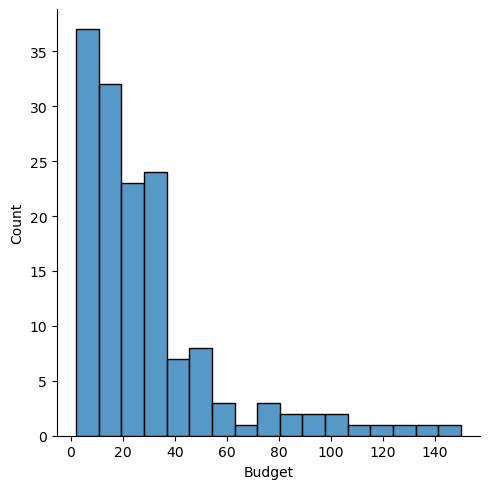

In [74]:
sns.displot(bollywood_df['Budget'])
plt.show()

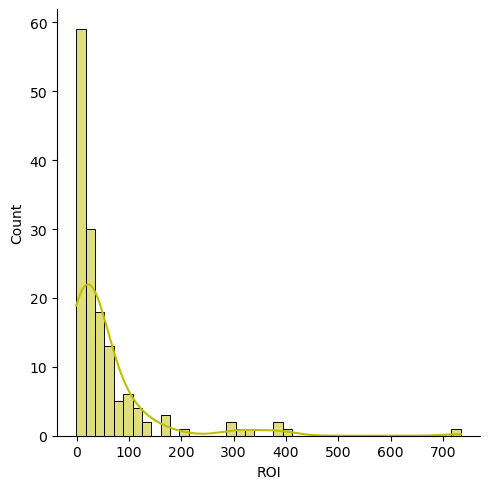

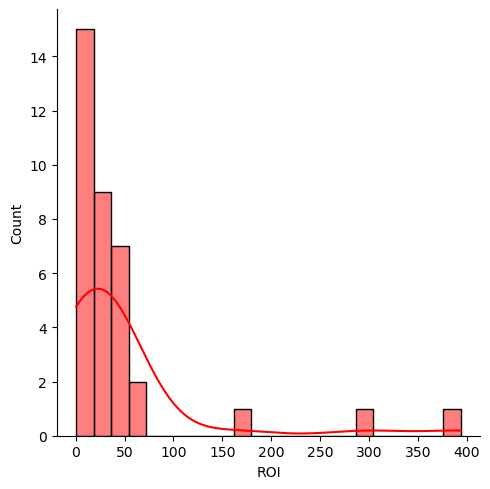

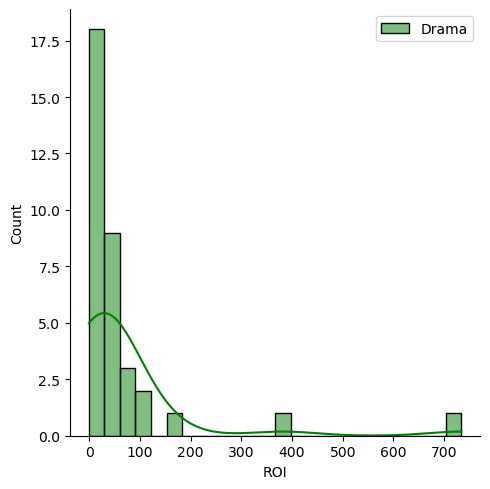

In [80]:
comedy_data = bollywood_df[bollywood_df['Genre'] == 'Comedy']['ROI']
drama_data = bollywood_df[bollywood_df['Genre'] == 'Drama']['ROI']
sns.displot(bollywood_df['ROI'], color='y', label='ROI', kde=True)
sns.displot(comedy_data, color='r', label='Comedy', kde=True)
sns.displot(drama_data, color='g', label='Drama', kde=True)
plt.legend()
plt.show()